<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Actividad 2 - Trabajando con redes neuronales y Deep Learning!</h1></center>

<b>Juan David Escobar Escobar.</b></br>
* Enero 2022.
* Grupo 14.

## EDA - Exploración de datos

### importar librerias e inicializar variables globales

Como uso una laptop Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [503]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [504]:
pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [505]:
pip install ann_visualizer

Note: you may need to restart the kernel to use updated packages.


In [506]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [507]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas as pd

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns
from seaborn import lmplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn import tree

import plotly.graph_objs as go
import plotly.offline as py

import pydotplus

import numpy

from scipy import stats

from mlxtend.plotting import plot_decision_regions

import os

In [508]:
import pathlib # es un componente permite manipular rutas de sistemas de archivos de forma rápida en cualquier sistema operativo.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import requests
import io

print(tf.__version__)

2.7.0


### Cargar dataset en memoria

In [510]:
col_names = ["age","sex","bmi","children","smoker","region","charges"]

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(df.head())

df.shape

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


(1338, 7)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Fase exploratoria de los datos

In [512]:
# Validar valores unicos para atributos categoricos

print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [513]:
# Validar missing values en todo el df

print(df.isnull().sum())
print('-'*15)
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
---------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [514]:
# Eliminar registros que tienen missing values 
df = df.dropna()
df.shape

(1338, 7)

In [515]:
# Eliminar registros duplicar
df.drop_duplicates()
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [516]:
# Conversión de valores categoricos a númericos mediante One-Hot

sex = df.pop('sex')
smoker = df.pop('smoker')
region = df.pop('region')

# sex categories
df['female'] = (sex == 'female')*1.0
df['male']   = (sex == 'male')*1.0

# smoker categories
df['yes'] = (smoker == 'yes')*1.0
df['no']  = (smoker == 'no')*1.0

# region categories
df['southwest'] = (region == 'southwest')*1.0
df['southeast'] = (region == 'southeast')*1.0
df['northwest'] = (region == 'northwest')*1.0
df['northeast'] = (region == 'northeast')*1.0

df.tail()

,age,bmi,children,charges,female,male,yes,no,southwest,southeast,northwest,northeast
1333,50,30.97,3,10600.5483,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,18,31.92,0,2205.9808,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1335,18,36.85,0,1629.8335,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1336,21,25.80,0,2007.9450,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1337,61,29.07,0,29141.3603,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


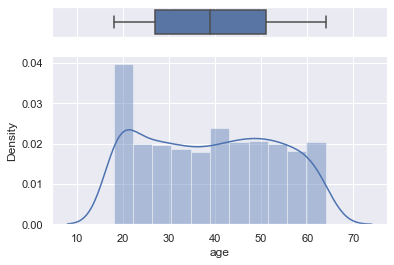

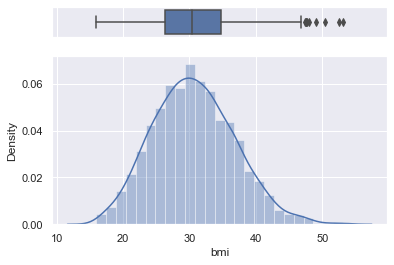

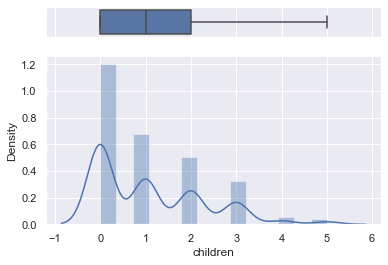

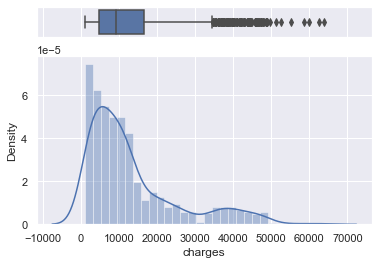

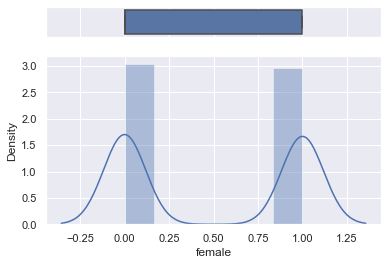

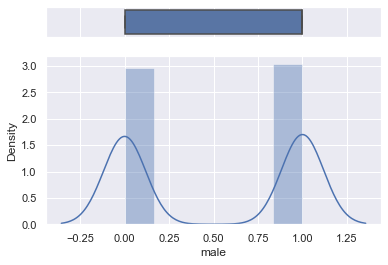

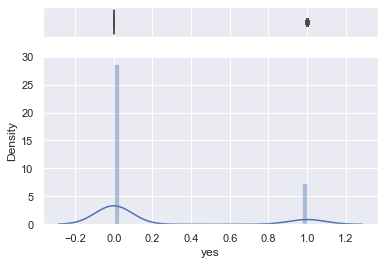

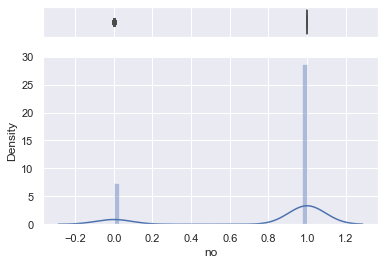

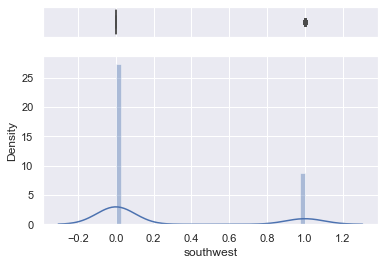

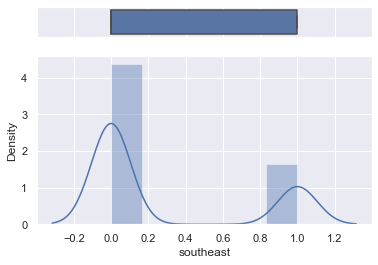

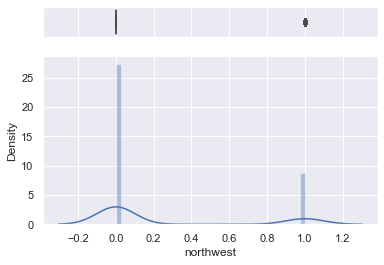

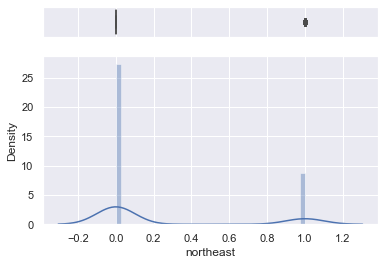

In [517]:
import warnings
warnings.filterwarnings('ignore')

def graficar_histograma_cuantitativas(col_numericas, df):
    
    for col in col_numericas:
                
        # Cut the window in 2 parts
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

        # Add a graph in each part
        sns.boxplot(df[col], ax=ax_box)
        sns.distplot(df[col], ax=ax_hist)
        
        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')  

columns = list(list(df.columns))        
graficar_histograma_cuantitativas(columns, df)

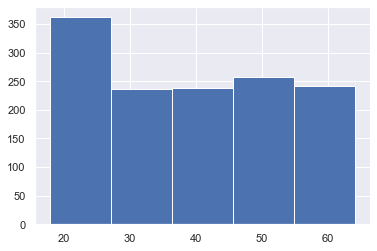

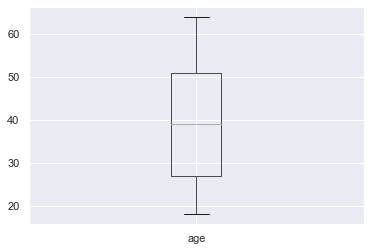

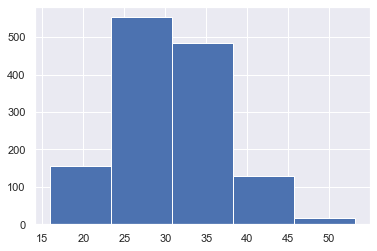

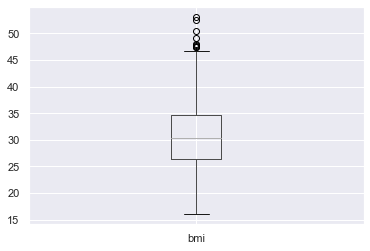

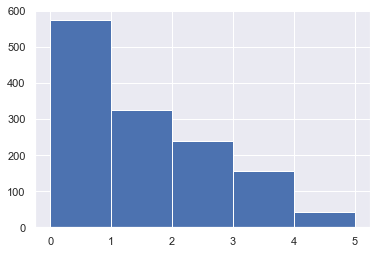

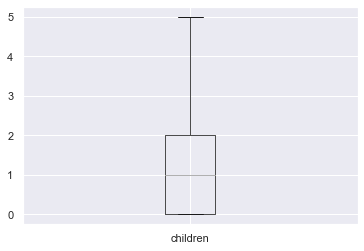

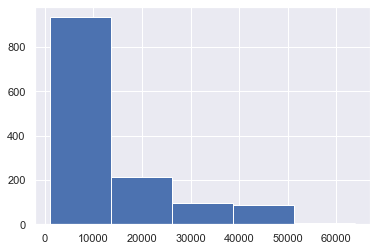

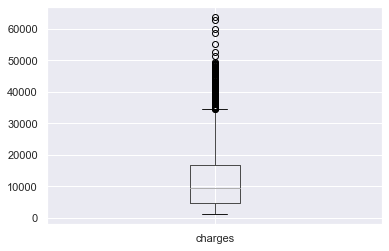

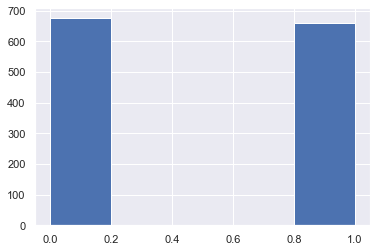

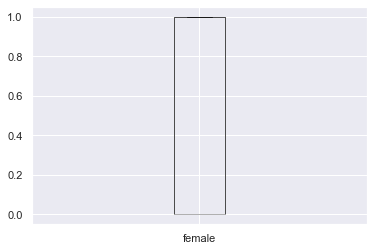

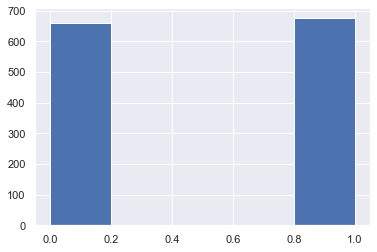

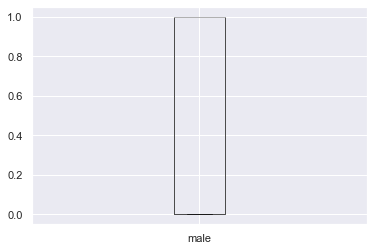

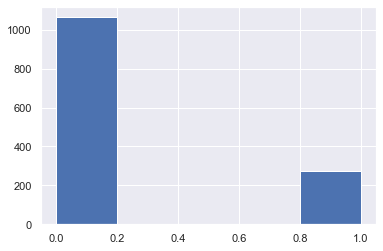

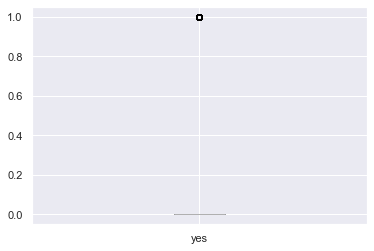

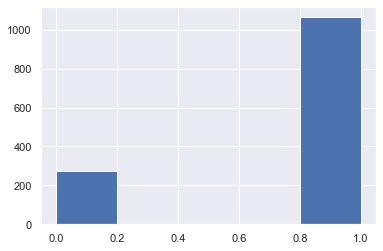

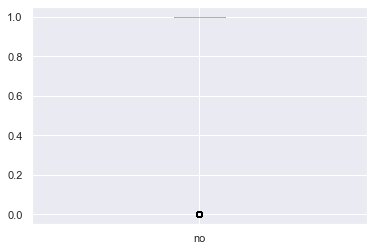

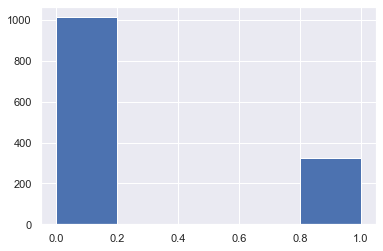

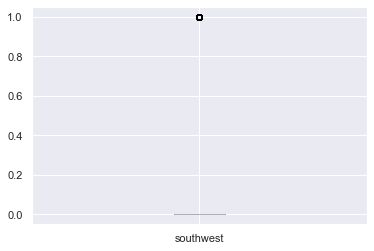

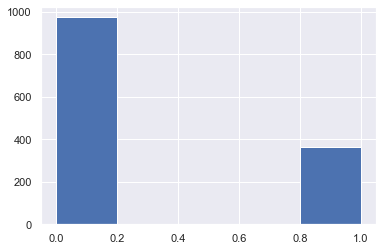

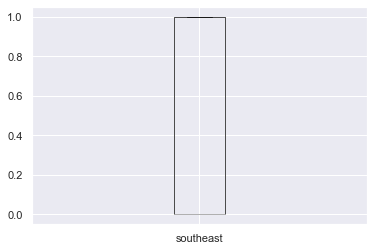

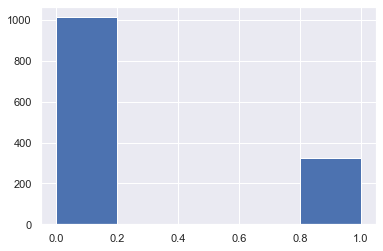

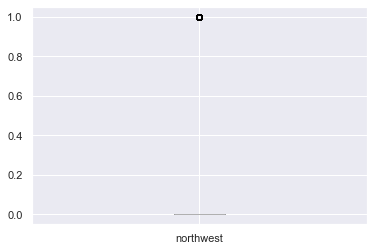

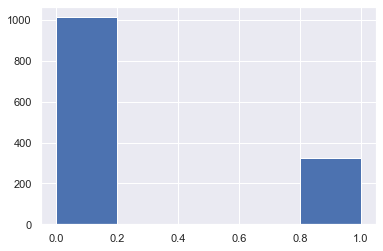

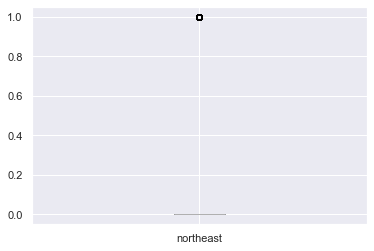

In [518]:
import warnings
warnings.filterwarnings('ignore')

def graficar_histograma_cuantitativas(col_numericas, df):
    
    for col in col_numericas:
                
        data_person = list(df[col])
        plt.hist(data_person, 5)
        plt.show()
        df.boxplot(column=[col])
        plt.show()  

columns = list(list(df.columns))        
graficar_histograma_cuantitativas(columns, df)

### Dividir los datos en entrenamiento y prueba

In [519]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [520]:
train_dataset.count

<bound method DataFrame.count of       age     bmi  children      charges  female  male  yes   no  southwest  \
578    52  30.200         1   9724.53000     0.0   1.0  0.0  1.0        1.0   
610    47  29.370         1   8547.69130     1.0   0.0  0.0  1.0        0.0   
569    48  40.565         2  45702.02235     0.0   1.0  1.0  0.0        0.0   
1034   61  38.380         0  12950.07120     0.0   1.0  0.0  1.0        0.0   
198    51  18.050         0   9644.25250     1.0   0.0  0.0  1.0        0.0   
...   ...     ...       ...          ...     ...   ...  ...  ...        ...   
584    19  20.700         0   1242.81600     0.0   1.0  0.0  1.0        1.0   
147    51  37.730         1   9877.60770     1.0   0.0  0.0  1.0        0.0   
160    42  26.600         0  21348.70600     1.0   0.0  1.0  0.0        0.0   
750    37  26.400         0  19539.24300     1.0   0.0  1.0  0.0        0.0   
859    57  28.100         0  10965.44600     0.0   1.0  0.0  1.0        1.0   

      southeast  n

In [521]:
test_dataset.count()

age          268
bmi          268
children     268
charges      268
female       268
male         268
yes          268
no           268
southwest    268
southeast    268
northwest    268
northeast    268
dtype: int64

### Explorando los datos 

distribución sobre cada par de columnas de entrenamiento y la clase.

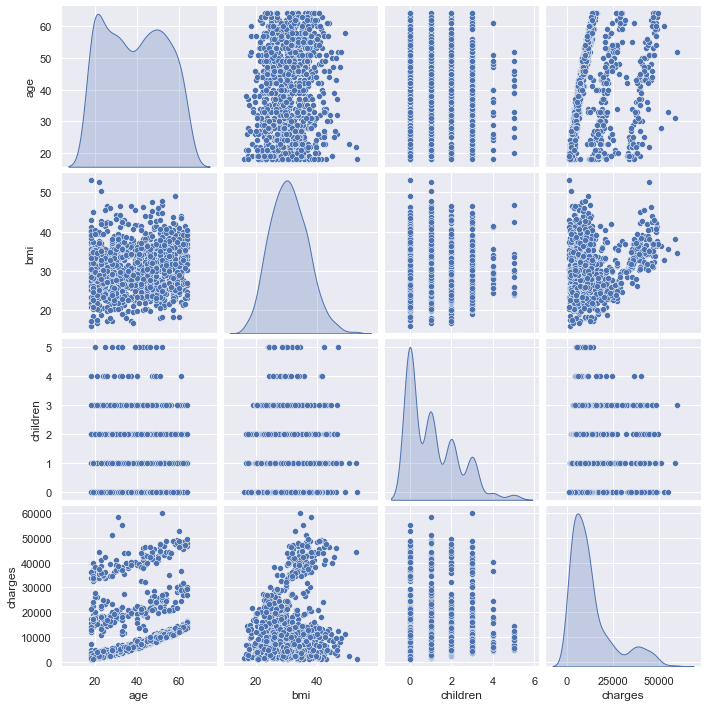

In [522]:
sns.pairplot(train_dataset[["age", "bmi", "children", "charges"]], diag_kind="kde")

In [523]:
df.describe()

,age,bmi,children,charges,female,male,yes,no,southwest,southeast,northwest,northeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.204783,0.795217,0.242900,0.272048,0.242900,0.242152
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428995,0.445181,0.428995,0.428546
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [524]:
train_stats = train_dataset.describe()
train_stats.pop("charges")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.00,26.000,39.000,51.0,64.00
bmi,1070.0,30.735164,6.064314,15.96,26.315,30.495,34.8,53.13
children,1070.0,1.093458,1.211364,0.00,0.000,1.000,2.0,5.00
female,1070.0,0.501869,0.500230,0.00,0.000,1.000,1.0,1.00
male,1070.0,0.498131,0.500230,0.00,0.000,0.000,1.0,1.00
yes,1070.0,0.199065,0.399484,0.00,0.000,0.000,0.0,1.00
no,1070.0,0.800935,0.399484,0.00,1.000,1.000,1.0,1.00
southwest,1070.0,0.234579,0.423934,0.00,0.000,0.000,0.0,1.00
southeast,1070.0,0.281308,0.449848,0.00,0.000,0.000,1.0,1.00
northwest,1070.0,0.235514,0.424518,0.00,0.000,0.000,0.0,1.00


Con respecto a la tabla anterior 

### Separar conjunto de variable objetivo 

In [525]:
train_labels = train_dataset.pop('charges')
test_labels = test_dataset.pop('charges')

In [526]:
train_labels.count()

1070

In [527]:
test_labels.count()

268

### Normalización de datos

In [528]:
# Tenemos dos variables con rangos maximos y minimos un poco diferentes, procedemos a normalizar los datos

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [529]:
normed_train_data.count()

age          1070
bmi          1070
children     1070
female       1070
male         1070
yes          1070
no           1070
southwest    1070
southeast    1070
northwest    1070
northeast    1070
dtype: int64

In [530]:
normed_test_data.count()

age          268
bmi          268
children     268
female       268
male         268
yes          268
no           268
southwest    268
southeast    268
northwest    268
northeast    268
dtype: int64

## Contrucción del modelo - 1 Capa

In [531]:
# train_dataset = df.sample(frac=0.8,random_state=0)
# test_dataset = df.drop(train_dataset.index)

# train_labels = train_dataset.pop('charges')
# test_labels = test_dataset.pop('charges')

# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

train_dataset.count() # 1070
test_dataset.count() #268

age          268
bmi          268
children     268
female       268
male         268
yes          268
no           268
southwest    268
southeast    268
northwest    268
northeast    268
dtype: int64

In [532]:
# Divida los datos en datos de entrenamiento y prueba de entrada (x), y datos de entrenamiento y prueba de 
# salida (y),
# siendo los datos de entrenamiento el 80 % de los datos y los datos de prueba el 20 % restante de los datos

df_x = df.loc[:, df.columns!='charges']
df_y = df.pop('charges')

In [533]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

print(len(X_train), len(train_dataset.values.tolist()),  len(normed_train_data.values.tolist()))
print(len(X_test), len(test_dataset.values.tolist()),  len(normed_test_data.values.tolist()))
print(len(y_train), len(train_labels.values.tolist()))
print(len(y_test), len(test_labels.values.tolist()))

1070 1070 1070
268 268 268
1070 1070
268 268


In [534]:
# Escalar los datos de entrada de entrenamiento y prueba
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

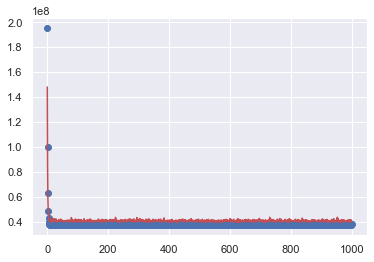

In [535]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_1C = Sequential()
model_1C.add(Dense(1, input_shape=(11,), activation = 'relu'))
# model_1C.compile(Adam(lr=100), 'mean_squared_error')
#optimizer = tf.keras.optimizers.RMSprop(0.001) 
optimizer = tf.keras.optimizers.RMSprop(lr=100) 
model_1C.compile(loss='mse',
               optimizer=optimizer,
               metrics=['mae', 'mse'])


history = model_1C.fit(X_train, 
                    y_train,
                    epochs = 1000, 
                    validation_split = 0.2,
                    verbose = 0)

# train_dataset, 
# test_dataset, 

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

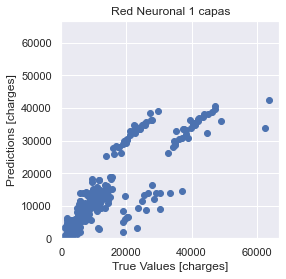

In [562]:
test_predictions = model_1C.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.title('Red Neuronal 1 capas')
plt.xlabel('True Values [charges]')
plt.ylabel('Predictions [charges]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [536]:
loss, mae, mse = model_1C.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} charges".format(mae))

9/9 - 0s - loss: 44745536.0000 - mae: 4619.6797 - mse: 44745536.0000 - 105ms/epoch - 12ms/step
Testing set Mean Abs Error: 4619.68 charges


In [537]:
# Ejecuta el modelo (el que tiene la función de activación, aunque esto realmente no importa ya que realizan lo
# mismo)
# con sus pesos actuales en los datos de entrenamiento y prueba
from sklearn.metrics import r2_score

y_train_pred = model_1C.predict(X_train)
y_test_pred = model_1C.predict(X_test)

# Calcula e imprime la puntuación r2 de los datos de entrenamiento y prueba

R2_train_set_1c = r2_score(y_train, y_train_pred)
R2_test_set_1c = r2_score(y_test, y_test_pred)
R2_test_MAPE = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
                           
print("The R2 score on the Train set is:\t{:0.3f}".format(R2_train_set_1c))
print("The R2 score on the Test set is:\t{:0.3f}".format(R2_test_set_1c))
print('MAPE DL Score : %.3f' % R2_test_MAPE)

The R2 score on the Train set is:	0.743
The R2 score on the Test set is:	0.781
MAPE DL Score : 0.452


## Contrucción del modelo - 3 Capas

Modelo secuencial de 2 capas densamente conectadas y una capa de salida con un valor continuo

In [538]:
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras import activations


def build_model():
    model = keras.Sequential([
       layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
       layers.Dense(64, activation='relu'),
#        layers.Dense(512, activation='relu'),
#        layers.Dense(512, activation='relu'),
#        layers.Dense(512, activation='relu'),
       layers.Dense(1)
    ])
    
    #model.compile(Adam(lr=0.003), 'mean_squared_error')
    
    optimizer = tf.keras.optimizers.RMSprop(0.001) 
    model.compile(loss='mse',
                   optimizer=optimizer,
                   metrics=['mae', 'mse'])
    return model

In [539]:
model = build_model()

Epoch 00572: early stopping


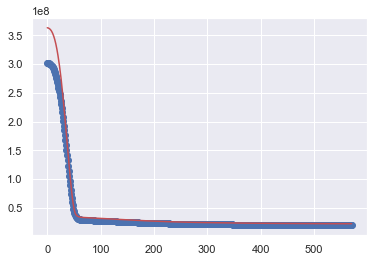

In [540]:
from keras.callbacks import EarlyStopping

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
# history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose = 0, 
#                     callbacks = [earlystopper])

history = model.fit(normed_train_data, train_labels, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [541]:
from sklearn.metrics import r2_score

# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

y_train_pred = model.predict(normed_train_data)
y_test_pred = model.predict(normed_test_data)


# Calcula e imprime la puntuación r2 de los datos de entrenamiento y prueba
print("charges R2 DL on the Train set is:\t{:0.3f}".format(r2_score(train_labels, y_train_pred)))
print("charges R2 DL on the Test set is:\t{:0.3f}".format(r2_score(test_labels, y_test_pred)))

charges R2 DL on the Train set is:	0.860
charges R2 DL on the Test set is:	0.781


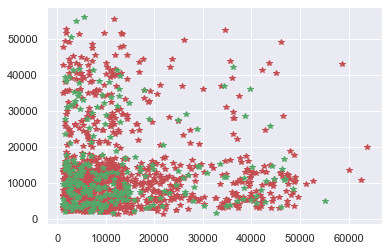

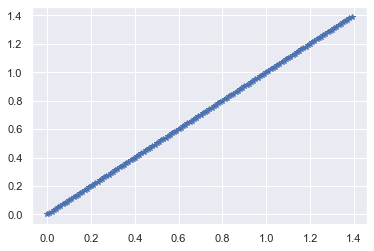

In [542]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,140):
    plt.plot(i/100,i/100,'*b')

Descipción resumida del modelo

In [543]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                768       
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


Pruebas con 10 datos del conjunto de entrenamiento

In [544]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[10435.646 ],
       [10372.66  ],
       [49330.695 ],
       [14314.186 ],
       [11623.244 ],
       [ 6482.985 ],
       [ 3152.4631],
       [12375.264 ],
       [ 9333.148 ],
       [ 7295.387 ]], dtype=float32)

### Entrenamiento del modelo

In [545]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(normed_train_data, 
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [546]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,16461025.0,2267.162109,16461025.0,21373834.0,2660.090820,21373834.0,995
996,16464287.0,2257.338867,16464287.0,21341014.0,2682.830811,21341014.0,996
997,16447017.0,2276.622803,16447017.0,21337464.0,2676.954102,21337464.0,997
998,16454233.0,2251.146240,16454233.0,21332566.0,2677.234131,21332566.0,998
999,16441380.0,2268.608398,16441380.0,21332346.0,2669.039795,21332346.0,999


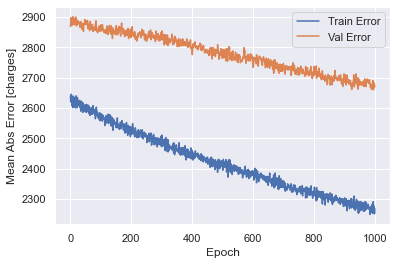

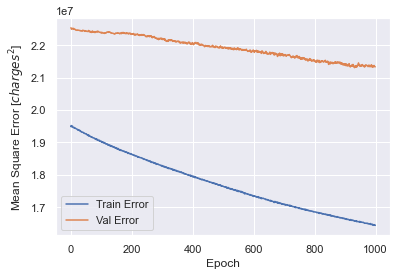

In [547]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [charges]')
    plt.plot(hist['epoch'], hist['mae'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
               label = 'Val Error')
    #plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$charges^2$]')
    plt.plot(hist['epoch'], hist['mse'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

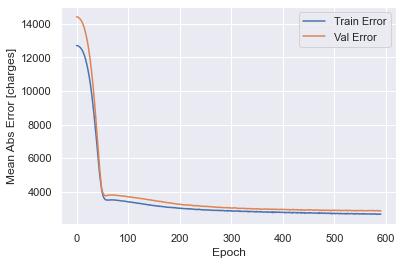

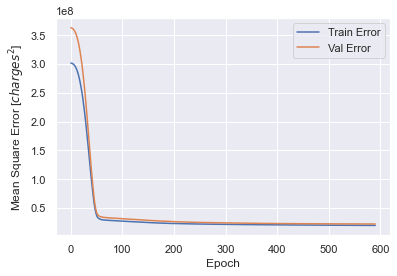

In [548]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS,
                    validation_split = 0.2, 
                    verbose=0, 
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

Metricas de perdida y error con respecto a el conjunto de validación

In [549]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} charges".format(mae))

9/9 - 0s - loss: 34701064.0000 - mae: 3444.9724 - mse: 34701064.0000 - 21ms/epoch - 2ms/step
Testing set Mean Abs Error: 3444.97 charges


### Predicciones

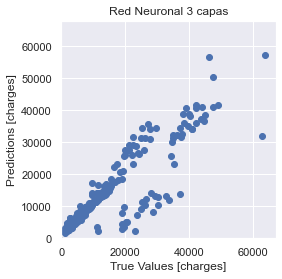

In [561]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.title('Red Neuronal 3 capas')
plt.xlabel('True Values [charges]')
plt.ylabel('Predictions [charges]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Distribuación de errores

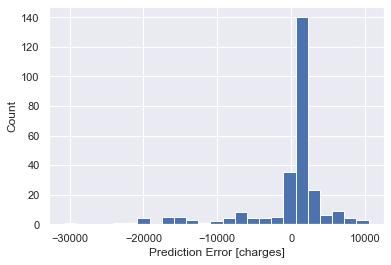

In [551]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [charges]")
_ = plt.ylabel("Count")

## Regresión Lineal - RandomForestRegressor

In [552]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
import numpy as np

modelRF = RandomForestRegressor(n_estimators=500, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_testRDF= modelRF.predict(test_dataset)

In [560]:
# Resultados de cada modelo

print('-'*100)
print('Red Neuronal - 1 capa')
print('-'*100)

print('Parámtros:')

print('  * Numero capas: 1')
print('  * Input_shape: 11')
print('  * Neuronas: C1 = 1 neurona')
print('  * Función de activación: Relu')
print('  * epochs: 1000')
print('  * Optimización del modelo: \n    RMSprop(learning_rate: 100) ')

print('Resultados:')

print("  * loss: 353932224.0000")
print("  * mae: 14076.4004")
print("  * mse: 353932224.0000")
print("  * Puntaje R2 Train set:\t{:0.3f}".format(R2_train_set_1c))
print("  * Puntaje R2 Test set:\t{:0.3f}".format(R2_test_set_1c))
print('  * MAPE DL Score : %.3f' % R2_test_MAPE)
print('\n')

print('-'*100)
print('Red Neuronal - 3 capa')
print('-'*100)
print('Parámtros:')
print('  * Numero capas: 3')
print('  * Input_shape: 11')
print('  * Neuronas: C1 = 64 neurona, \n C2 = 64 neurona, C3 = 1 neurona')
print('  * Función de activación: Relu')
print('  * epochs: 1000')
print('  * Optimización del modelo: \n    RMSprop(learning_rate: 0.001) ')
print('Resultados:')
print("  * loss: ???????")
print('  * mse DL : %.3f' % mse)
print('  * mae DL : %.3f' % mae)
print("  * R2 DL on the Train set is:\t{:0.3f}".format(r2_score(train_labels, y_train_pred)))
print("  * R2 DL on the Test set is:\t{:0.3f}".format(r2_score(test_labels, y_test_pred)))
print('  * MAPE DL Score : %.3f' % metrics.mean_absolute_percentage_error(test_labels, y_test_pred))
print('\n')

print('-'*100)
print('Random Forest Regressor')
print('-'*100)
print('Parámtros:')
print('  * criterion: mse / squared_error')
print('  * n_estimators: 500')
print('  * random_state: 0')
print('Resultados:')
print('  * mse RF : %.3f' % mean_squared_error(test_labels, preds_testRDF, squared=True))
print('  * mae RF : %.3f' % mean_absolute_error(test_labels, preds_testRDF))
print('  * R2  RF',r2_score(test_labels, preds_testRDF))
print("  * Root Mean Squared Error RF:", round(np.sqrt( metrics.mean_absolute_error(test_labels, preds_testRDF))))
print('  * MAPE RF Score : %.3f' % metrics.mean_absolute_percentage_error(test_labels, preds_testRDF))

----------------------------------------------------------------------------------------------------
Red Neuronal - 1 capa
----------------------------------------------------------------------------------------------------
Parámtros:
  * Numero capas: 1
  * Input_shape: 11
  * Neuronas: C1 = 1 neurona
  * Función de activación: Relu
  * epochs: 1000
  * Optimización del modelo: 
    RMSprop(learning_rate: 100) 
Resultados:
  * loss: 353932224.0000
  * mae: 14076.4004
  * mse: 353932224.0000
  * Puntaje R2 Train set:	0.743
  * Puntaje R2 Test set:	0.781
  * MAPE DL Score : 0.452


----------------------------------------------------------------------------------------------------
Red Neuronal - 3 capa
----------------------------------------------------------------------------------------------------
Parámtros:
  * Numero capas: 3
  * Input_shape: 11
  * Neuronas: C1 = 64 neurona, 
 C2 = 64 neurona, C3 = 1 neurona
  * Función de activación: Relu
  * epochs: 1000
  * Optimización del mo

In [554]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
 
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
 
from matplotlib.lines import Line2D
 
def simple_scatter_plot(x_data, y_data, output_filename, title_name, x_axis_label, y_axis_label):
    """Simple scatter plot.
 
    Args:
        x_data (list): List with x-axis data.
        y_data (list): List with y-axis data.
        output_filename (str): Path to output image in PNG format.
        title_name (int): Plot title.
        x_axis_label (str): X-axis Label.
        y_axis_label (str): Y-axis Label.
 
    """
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
 
    matplotlib.title(title_name)
 
    ax = seaborn.scatterplot(x=x_data, y=y_data)
 
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
 
    matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)
    matplotlib.plot()

0.89306


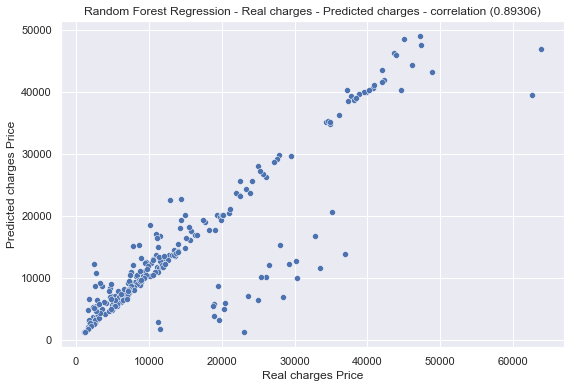

In [555]:
from scipy.stats import pearsonr
correlation = round(pearsonr(preds_testRDF, test_labels)[0], 5)
print(correlation)

output_filename = "rf_regression.png"
title_name = "Random Forest Regression - Real charges - Predicted charges - correlation ({})".format(correlation)
x_axis_label = "Real charges Price"
y_axis_label = "Predicted charges Price"
 
simple_scatter_plot(test_labels, preds_testRDF, output_filename, title_name, x_axis_label, y_axis_label)

In [556]:
# Generar un archivo pdf con un gráfico de la red construida
#!pip install ann_visualizer
# dependencias (pip install graphviz, conda install -c conda-forge python-graphviz)
#https://github.com/RedaOps/ann-visualizer
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="Artificial Neural network - charges");

In [557]:
# https://www.kaggle.com/moulibhaskar/comparison-of-random-models-on-insurance-data-set

error (coste, pérdida, loss) (diferencia entre la salida esperada y la salida real en la
iteración t).

α : tasa de aprendizaje (valor entre 0 y 1 que pondera la relevancia del error en la última
iteración). 

Funciones activacion: La función de activación se encarga de devolver una salida a partir de un valor de entrada, normalmente el conjunto de valores de salida en un rango determinado como (0,1) o (-1,1).


1. Sigmoid – Sigmoide = No se recomienda, no esta centrada en el origen y complica el aprendizaje (costosa cpu).

2. Tanh – Tangent Hyperbolic – Tangente hiperbólica = Tiene el mismo problema de la Sigmoid, pero si esta   centrada, produce el desvanecimiento del gradiene o error de propagación, en cada iteración el valor se hace mas pequeño y no puede corregir (costosa en cpu).

3. ReLU – Rectified Lineal Unit = Problema, cuando una neurona toma el valor cero en una iteracion, ya no aprende nunca mas, se corrigue tratando de que nunca tenga un valor null o cero.

4. Leaky ReLU – Rectified Lineal Unit = Usada para Regresion lineal en la salida y entrenamiento.

5. Softmax – Rectified Lineal Unit = Se usa a la salida de una red neuronal, valores acotados entre 0 y 1, se usa para clasificación de patrones. Si lo que se requiere es una regresión lineal, se usan funciones tipo lineal (Ej: prediccion numero de ventas, Señal, costo, se suma el valor de todas las salidas de las neuronas de la capa anterior).

https://www.diegocalvo.es/funcion-de-activacion-redes-neuronales/

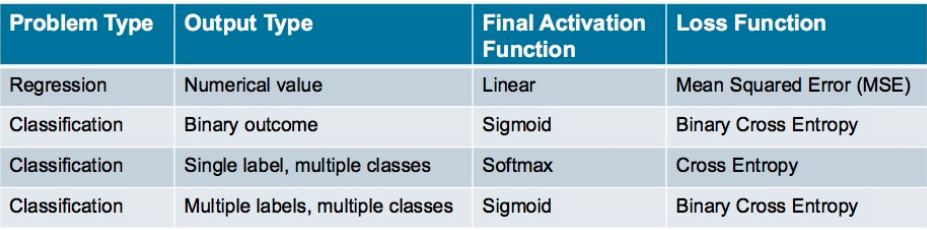


Regresión lineal

Trabaja con variables de salida continuas y un modelo de datos numerico. Tambien podemos obtener 
una salida para cualquier entrada. El modelo tiede a ser una linea recta positiva o negativa.

Se puede definir con la función y=f(x) = mx + b, siendo en nuestro caso 

y = la salida
m = pesos (W)
x = entradas
b = bias, sesgo o tendencia

La red neuronal se compone de una capa de entrada y una capa de salida conectadas por el peso (W), tambien 
tendremos un sesgo o bias para cada salida

Ej:

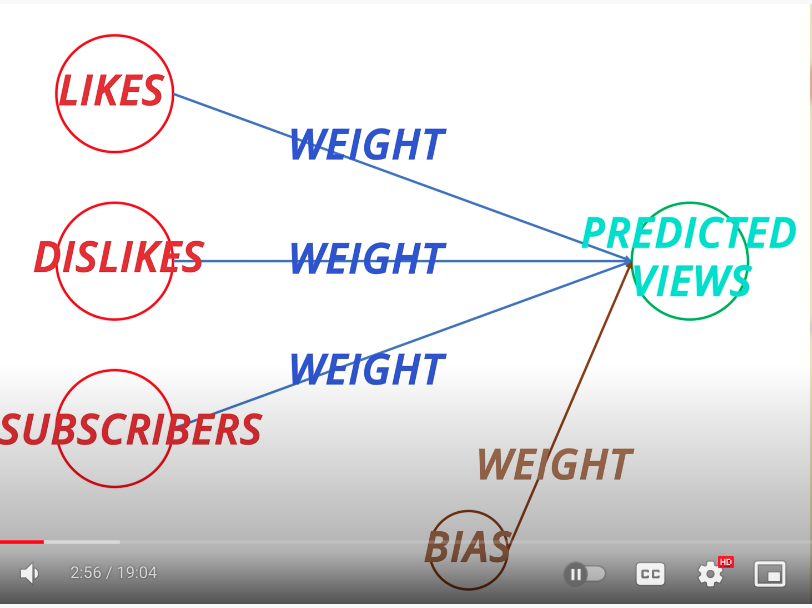

Trining Data = se usan para minimizar el costo de procesamiento
Test Data: conjunto de datos separado para validar el rendimiento del modelo

Sobreajuste: Ocurre cuando nuestro modelo aprende demasiado bien nuestros datos de entrenamiento y como
resultado sufre al generalizar.

1. Podemos validar si el modelo esta sobre ajustado con los datos de prueba train_test_split (muestra aleatoria).

2. Grafico de correlacion entre entradas X y salida Y.

3. Definir la estructura de la red Neuronal
3.1 Agrego la primera capa con 11 entradas sin funcion de activación

moldel = Secuential()
model.add(Dense(1, input_shape=(11,)))

3.2 las predicciones de este modelo serán una linea de 12 dimensiones y un sesgo.
3.3 Establecemos nuestro optimizador y la función de perdida
    "error cuadrático medio"
    
model.compile(Adam(lr=i), 'mean_squared_error')    

los optimizadores nos indican como actualizamos nuestros pesos y Adam es una alternativa
al descenso de gradiante estocástico que funciona mejor. El gradiente estocastico
es donde usando derivados, actualizamos todos los pesos en un subconjunto de los datos y brinda
muchos beneficios de rendimiento.

mean_squared_error = funcion de costo que definimos en la serie neuronal

3.4 Parametros de entrenamiento

history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1, verbose = 0)
history_dict = history.history


-epochs = Número de veces que se ciclan los datos.
-verbose = muestra a mayor o menor detalle el resultado de entrenamiento del modelo.
-validation_split = muestra aleatoria de datos de entrenamiento, para el caso es de 10%
                    usado para validar la precisión de la red neuronal.
                    
Es diferente de los datos de prueba que solo usamos una vez que nuestro modelo termine de entrenar.


-Batch size = Durante cada iteración, el modelo calcula la salida pronosticada para 32 EJ batch size
              puntos de datos, calcula el costo de cada uno de ellos, promedia este valor y usa derivados
              para actualizar todos los pesos.
              
ITERATION:
    
    MODEL(INPUTS) = PREDICTED OUTPUT
    COST = (Y-Y')^2 * 32 DATAPOINTS
    
Luego promedia este valor y usa los derivados para actualizar todos los pesos

COST1 + COST2 + COST3 + COSTN / 32

Luego el modelo repite este proceso hasta que ha recorrido todos los puntos de datos, eso es un (EPOCH)

3.5 Validación del modelo


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'bo', label = 'training loss')
plt.plot(val_loss_values, 'r', label = 'val training loss')

Red = Perdida del conjunto de datos de validacion = 10%
Blue = Perdida de datos de entrenamiento

Ver min 13:27

3.5 Validación del precisión en un modelo de regresión ? R2 (R^2) SCORE =
    Medida estadistica que nos dice que tan cerca están los datos del modelo de regresión. 
    Se extiende de 0 a 100% (0-1)
    
    0: No hay correlación entre la entrada y la salida.
    1: Toda la correlación


from sklearn.metrics import r2_score
    
Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))    

y_train = y
y_train_pred = y'

R2 Train: 0.776
r2 Test: 0.675

El puntaje de los datos de prueba es ligeramente mayor que los de entrenamiento, lo que nos
indica que probablemente tenemos un sobreajuste.

https://github.com/antaloaalonso/Regression-Model-YT-Video/blob/master/Regression%20Model%20on%20YT%20Videos%20Dataset%20.ipynb

4. Pruebas con un modelo mas complejo

No hay garantia de que el performance del modelo mejore.

model = Sequential()
model.add(Dense(13, input_shape=(3,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])


4.1 Se agregan 13 salidas en la primera capa.
4.2 Se agregan 4 capas ocultas, cada una con 13 entradas y 13 salidas.
4.3 se agrega una capa de salida
4.5 se define función de optimización, tasa de aprendizaje = 0.003, despues de entrenar el modelo 6000 iteraciones o epochs.
4.6 La perdida de datos de entrenamiento y datos de validación convergen en las 2500 iteraciones y luego
el modelo se comenzo a sobre ajustar con el costo de datos de entrenamiento, mejorando y el costo de diviion de la validacion comenzando a disminuir. 

5. EarlyStopping = esta función reibe como parametros como la perdida deseada o el costo que desea monitorear, un delta minimo para establecer un limite de cuanto debe mejorar el modelo en un epoch o cliclo antes de que finalice y el verbose.

Esta función se envia al la funcion fit en su parametro callback

6. comparar R2 de ambos modelos.

7. Maneras de mejorar el rendimiento de los modelos:

BASH NORMALIZATION
WEIGHT REGULARIZATION
DROPOUT
DATA ARGUMENTATION
OTHERS

* Error cuadratico medio (rmse) = 

-Raiz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.

-Indica cuán cerca están los puntos de datos observados
de los valores predichos del modelo.

-Es una buena medida de la precisión con la que el modelo
predice la respuesta, es el criterio mas importante
para ajustar el modelo.

-Es similar a la desviacion estandar:
valores mas bajos igual a mejor ajuste.

* Error absoluto medio (mae)= 

-Es el promedio de la diferencia absoluta entre los
valores predichos y el valor observado.

-Es un puntaje lineal, significa que todas las
diferencias individuales se ponderan por igual en el
promedio.

* R^2

-Indica la bondad o aptitud del modelo, muestra que
las variables independientes seleccionadas, explican la 
variabilidad en sus variables dependientes.

-Escala de 0-1, 0-100%


In [558]:
from IPython.display import HTML

# MSE = mean square error (Error cuadratico medio)                            = EMC (Error medio cuadrado)
# MAPE = mean absolute percentage error (Porcentaje de error absoluto medio)  = PEMA (Porcentaje de error absoluto medio)
# MAD =  mean absolute error (error absoluto medio))                          = DAM (error absoluto desviación medio)
HTML('<iframe width="800" height="800" src="https://www.youtube.com/watch?v=5DFHzDxBgb8" frameborder="0" allowfullscreen></iframe>')

In [559]:
HTML('<iframe width="800" height="800" src="https://www.youtube.com/watch?v=19sULW0Bidw" allowfullscreen></iframe>')

Algunas Referencias Bibliograficas

* https://keras.io/api/optimizers/adam/
* https://www.youtube.com/watch?v=wMg1HU6pfnk
* https://www.gestiondeoperaciones.net/proyeccion-de-demanda/error-porcentual-absoluto-medio-mape-en-un-pronostico-de-demanda/
* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
* https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
* https://github.com/jagjeet555/Kaggle/blob/main/Untitled3.ipynb
* https://www.tensorflow.org/tutorials/keras/regression?hl=es-419